# 14.3.1 LeNet

**LeNet (1998):** $\;$ CNN de Yann LeCun para MNIST

<div align="center">
<table><tr>
<td style="border: none;"><img src="LeNet.png" width=300/></td>
<td style="border: none;"><img src="Figure_14.15.png" width=800/></td>
</tr></table>
</div>

**Ejemplo:** $\;$ LeNet con terminación temprana (paciencia 2)

In [3]:
import numpy as np; import matplotlib.pyplot as plt
import tensorflow as tf; from tensorflow import keras; import tensorflow_datasets as tfds
ds_train, ds_test = tfds.load('mnist', split=['train', 'test'], as_supervised=True)
def normalize_img(image, label): return tf.cast(image, tf.float32) / 255., label
X_train = ds_train.map(normalize_img).batch(128)
X_test = ds_test.map(normalize_img).batch(128)
M = keras.Sequential()
M.add(keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))
M.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
M.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))
M.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=2))
M.add(keras.layers.Flatten())
M.add(keras.layers.Dense(units=120, activation='tanh'))
M.add(keras.layers.Dense(units=84, activation='tanh'))
M.add(keras.layers.Dense(units=10, activation = 'softmax'))
optimizer = tf.keras.optimizers.SGD(0.1)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
metrics = [keras.metrics.SparseCategoricalAccuracy()]
M.compile(optimizer=optimizer, loss=loss, metrics=metrics)
EarlyStopping_cb = keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=2)
H = M.fit(X_train, epochs=100, validation_data=X_test, verbose=0, callbacks=[EarlyStopping_cb])

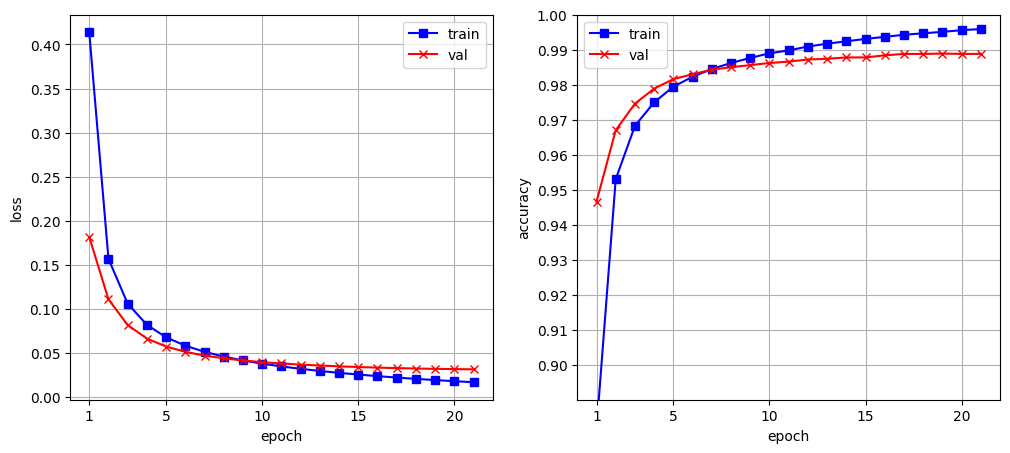

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
xx = np.arange(1, len(H.history['loss'])+1)
xticks = np.concatenate((np.array([1]), np.arange(5, len(H.history['loss'])+1, 5)))
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss');
ax.set_xticks(xticks)
ax.plot(xx, H.history['loss'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_loss'], color='r', marker='x', label='val'); ax.legend()
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xticks); ax.set_yticks(np.arange(.9, 1.01, .01)); ax.set_ylim([.89, 1.])
ax.plot(xx, H.history['sparse_categorical_accuracy'], color='b', marker='s', label='train')
ax.plot(xx, H.history['val_sparse_categorical_accuracy'], color='r', marker='x', label='val'); ax.legend();